In [661]:
# import thư viện
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib import rcParams
%matplotlib inline  
import numpy as np
import time 

#DECISION TREE
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

#K Nearest Number 
from sklearn import neighbors
from sklearn.metrics import accuracy_score

#DBSCAN 
from sklearn.cluster import DBSCAN

#XGBOOST
from xgboost import XGBClassifier




Ta sẽ tiến hành đọc 2 file dữ liệu từ 2 file heart.csv và statlog.csv

In [662]:
#reading the dataset heart and statlog
df_heart = pd.read_csv('heart.csv')
df_statlog = pd.read_csv('cleveland.csv')

Ta tiến hành xem cấu trúc của dữ liệu

In [663]:
# dữ liệu của dataset heart
df_heart.shape 
# có 1025 dòng, 14 cột 

(1025, 14)

In [664]:
# dữ liệu của dataset statlog 
df_statlog.shape

(303, 14)

Sau khi đọc file dữ liệu từ heart và statlog ta sẽ tiến hành xem các thông tin có trong 2 file heart và statlog.csv


In [665]:
# xem các thông tin trong dataset heart
df_heart.head(12)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [666]:
# xem các thông tin trong dataset statlog 
df_statlog.head(12)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [667]:
# xem thông tin các cột dữ liệu trong dataset heart
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [668]:
df_statlog.head(12)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [669]:
# Kiểm tra dữ liệu có trống hay không trong data heart
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [670]:
# Kiểm tra dữ liệu trong statlog có trống hay không trong data statlog 
df_statlog.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [671]:
df_statlog.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [672]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [673]:
df_heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Sau đó ta sẽ tiến hành kiểm tra các dòng dữ liệu nào có bị trống hay bị trùng hay không 


<AxesSubplot:>

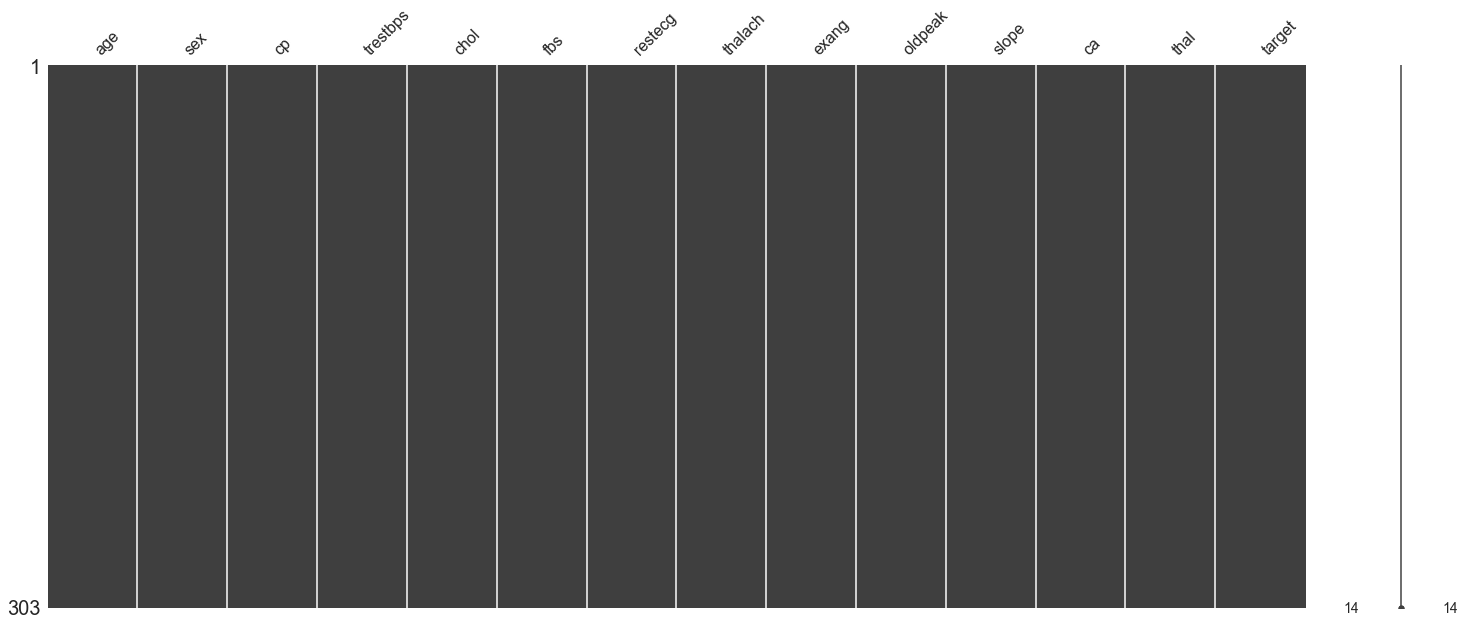

In [674]:
# Ta sẽ tiến hành kiểm tra các dòng dữ liệu xem có dòng dữ liệu nào bị trống hay không 
import missingno as msno 
msno.matrix(df_statlog)

<AxesSubplot:>

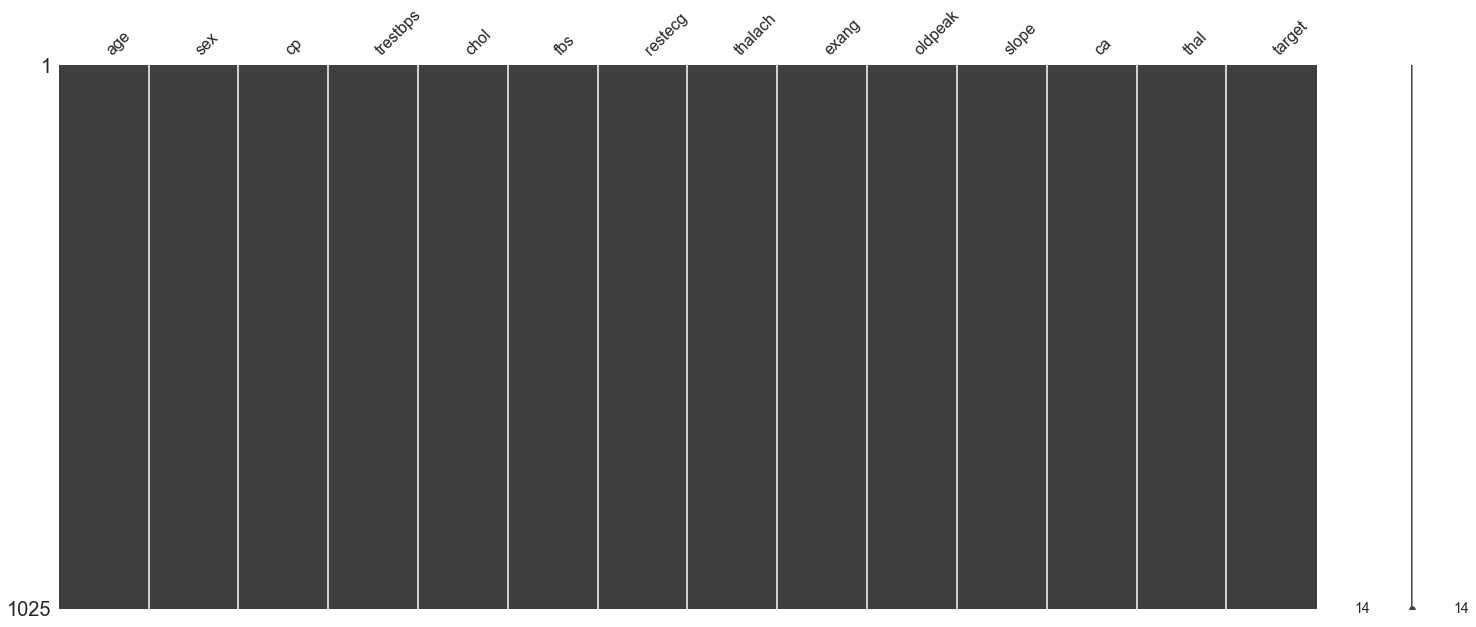

In [675]:
import missingno as msno 
msno.matrix(df_heart)

ÁP DỤNG HỆ SỐ TƯƠNG QUAN PEARSON, TA SẼ VẼ BIỂU ĐỒ TƯƠNG QUAN TRỰC HÓA BẰNG HEADMAP, MA TRẬN TƯƠNG QUAN 

<AxesSubplot:>

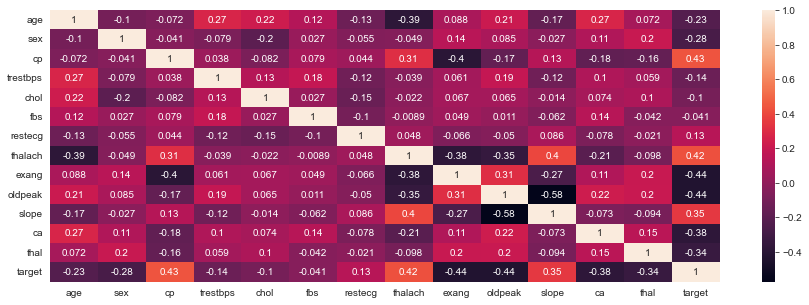

In [676]:
plt.figure(figsize=(15,5))
sns.heatmap(df_heart.corr(method='pearson'), annot=True)
# sns.heatmap(df_statlog.corr(method='pearson'), annot=True)

<AxesSubplot:>

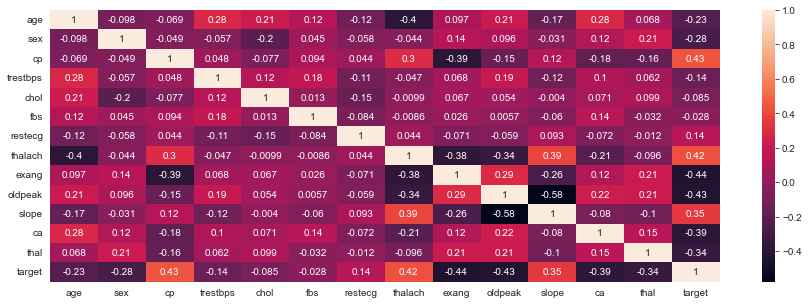

In [677]:
plt.figure(figsize=(15,5))
sns.heatmap(df_statlog.corr(method='pearson'), annot=True)

Ta tiến hành xóa cột chol, trestbps và fps vì độ tương quan cao nên ta để tránh gây ảnh hưởng đến kết quả đánh giá bài toán 


In [678]:
# Xóa trong data df_heart
del df_heart['chol']
del df_heart['fbs']
del df_heart['trestbps']


In [679]:
#Xóa trong data df_statlog
del df_statlog['chol']
del df_statlog['fbs']
del df_statlog['trestbps']

Tiến hành kiểm tra lại các data 

In [680]:
# kiểm tra data heart 
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1025 non-null   int64  
 1   sex      1025 non-null   int64  
 2   cp       1025 non-null   int64  
 3   restecg  1025 non-null   int64  
 4   thalach  1025 non-null   int64  
 5   exang    1025 non-null   int64  
 6   oldpeak  1025 non-null   float64
 7   slope    1025 non-null   int64  
 8   ca       1025 non-null   int64  
 9   thal     1025 non-null   int64  
 10  target   1025 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 88.2 KB


In [681]:
# kiểm tra data statlog
df_statlog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   restecg  303 non-null    int64  
 4   thalach  303 non-null    int64  
 5   exang    303 non-null    int64  
 6   oldpeak  303 non-null    float64
 7   slope    303 non-null    int64  
 8   ca       303 non-null    int64  
 9   thal     303 non-null    int64  
 10  target   303 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 26.2 KB


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'exang'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

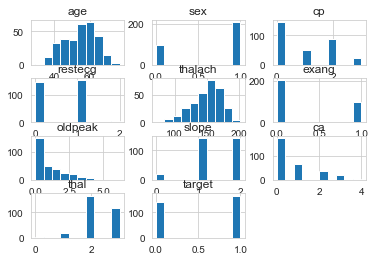

In [682]:
#Xem các thuộc tính trong dataset statlog
df_statlog.hist()


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'exang'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

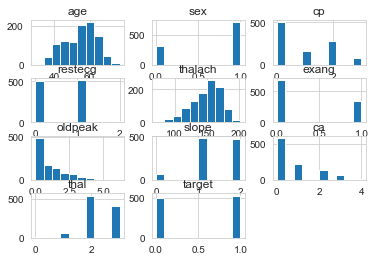

In [683]:
#Xem các thuộc tính của dataset heart 
df_heart.hist()

# ÁP DỤNG DBSCAN


In [684]:
#input data
data_heart = df_heart[["thalach", "age"]]
data_statlog = df_statlog[["thalach", "age"]]

# specify and fit model 

model_heart = DBSCAN(eps = 9, min_samples = 5).fit(data_heart)
model_statlog = DBSCAN(eps = 8, min_samples=5).fit(data_statlog)

Biểu diễn đồ thị data heart


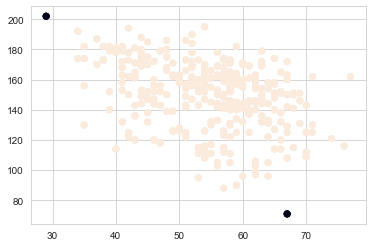

In [685]:
color_heart = model_heart.labels_
plt.scatter( data_heart["age"], data_heart["thalach"], c=color_heart)

Biểu diễn bằng đồ thị data_statlog

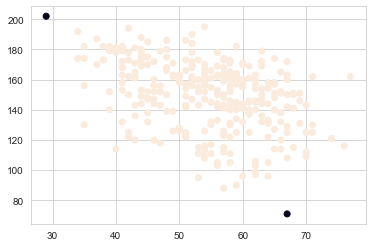

In [686]:
color_statlog = model_statlog.labels_
plt.scatter(data_statlog["age"], data_statlog["thalach"], c=color_statlog)

# TIẾN HÀNH CHẠY CÁC THUẬT TOÁN 



In [687]:
#Kiểm tra lại data trước khi chạy
df_statlog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   restecg  303 non-null    int64  
 4   thalach  303 non-null    int64  
 5   exang    303 non-null    int64  
 6   oldpeak  303 non-null    float64
 7   slope    303 non-null    int64  
 8   ca       303 non-null    int64  
 9   thal     303 non-null    int64  
 10  target   303 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 26.2 KB


Text(0.5, 1.0, 'Count of each Target Class')

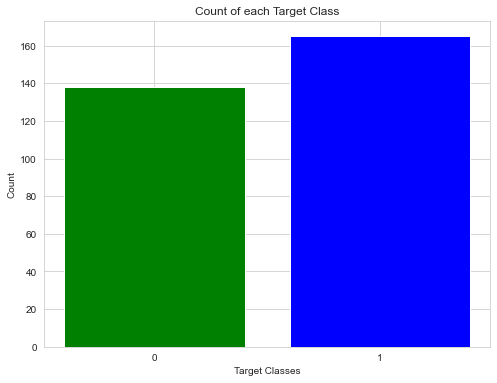

In [688]:
rcParams['figure.figsize'] = 8,6
plt.bar(df_statlog['target'].unique(), df_statlog['target'].value_counts(), color = ['blue', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [689]:
# Ta sẽ tiến hành tách data thành 2 phần để tiến hành training và test dữ liệu 
y = df_statlog['target']
X = df_statlog.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

# THUẬT TOÁN XGBOOST



In [690]:
xg = XGBClassifier()
start_time = time.time()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
end_time = time.time()
xgtime = end_time - start_time

In [691]:
cm_test = confusion_matrix(y_pred, y_test)

In [692]:
cm_test = confusion_matrix(y_pred, y_test)

In [693]:
y_pred_train = xg.predict(X_train)

In [694]:
for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0

In [695]:
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for XGBoost = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for XGBoost = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
xgbooost_accuracy = format((cm_test[0][0] + cm_test[1][1])/len(y_test))
point_accuracy = xgbooost_accuracy
print(xgbooost_accuracy)


Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.81
0.81


# XÂY DỰNG CÂY QUYẾT ĐỊNH ID3


In [696]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state = 0)
start_time = time.time()
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [697]:
tree_pred = clf.predict(X_test)
end_time = time.time()

In [698]:
t1 = end_time - start_time
print('thời gian chạy thuật là', t1)
p1 = metrics.accuracy_score(y_test, tree_pred)
tree_score1 = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy", tree_score1)
print("Report", metrics.classification_report(y_test, tree_pred))

thời gian chạy thuật là 0.055002689361572266
Accuracy 0.73
Report               precision    recall  f1-score   support

           0       0.71      0.75      0.73        48
           1       0.76      0.71      0.73        52

    accuracy                           0.73       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.73      0.73      0.73       100



In [699]:
#Tính ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.73')

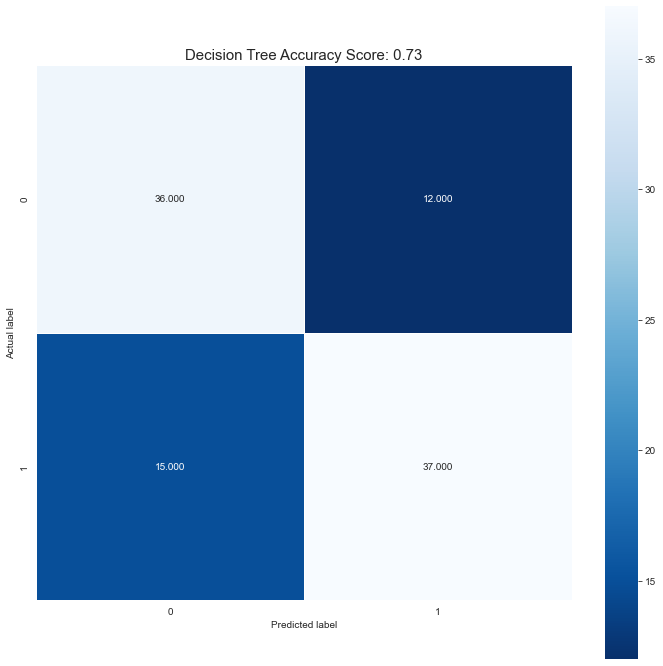

In [700]:
#Biểu diễn ra dạng đồ thị
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel("Actual label")
plt.xlabel("Predicted label");
title = "Decision Tree Accuracy Score: {0}".format(tree_score1)
plt.title(title, size = 15)

# XÂY DỰNG THUẬT TOÁN CÂY QUYẾT ĐỊNH CART 

In [701]:
start_time = time.time()
clf1 = tree.DecisionTreeClassifier(criterion="gini", random_state = 0)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [702]:
tree_pred1 = clf1.predict(X_test)
end_time = time.time()

In [703]:
t2 = end_time - start_time
print('Thời gian chạy thuật là', t2)
p2 = metrics.accuracy_score(y_test, tree_pred1)
tree_score2 = metrics.accuracy_score(y_test, tree_pred1)
print("Accuracy", tree_score2)
print("Report", metrics.classification_report(y_test, tree_pred1))

Thời gian chạy thuật là 0.06299448013305664
Accuracy 0.78
Report               precision    recall  f1-score   support

           0       0.74      0.83      0.78        48
           1       0.83      0.73      0.78        52

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100



Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.73')

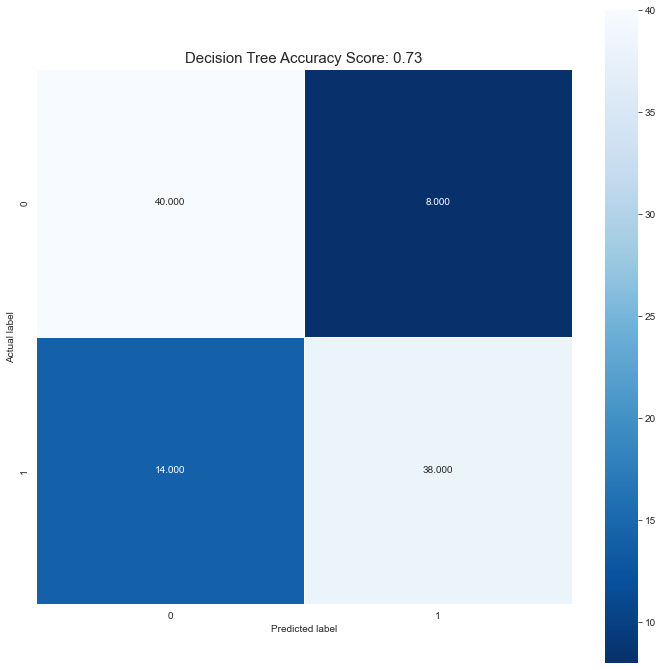

In [704]:
#Tính ma trận nhầm lẫn
tree_cm1 = metrics.confusion_matrix(y_test, tree_pred1)
#Biểu diễn ra dạng đồ thị
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm1, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel("Actual label")
plt.xlabel("Predicted label");
title = "Decision Tree Accuracy Score: {0}".format(tree_score1)
plt.title(title, size = 15)

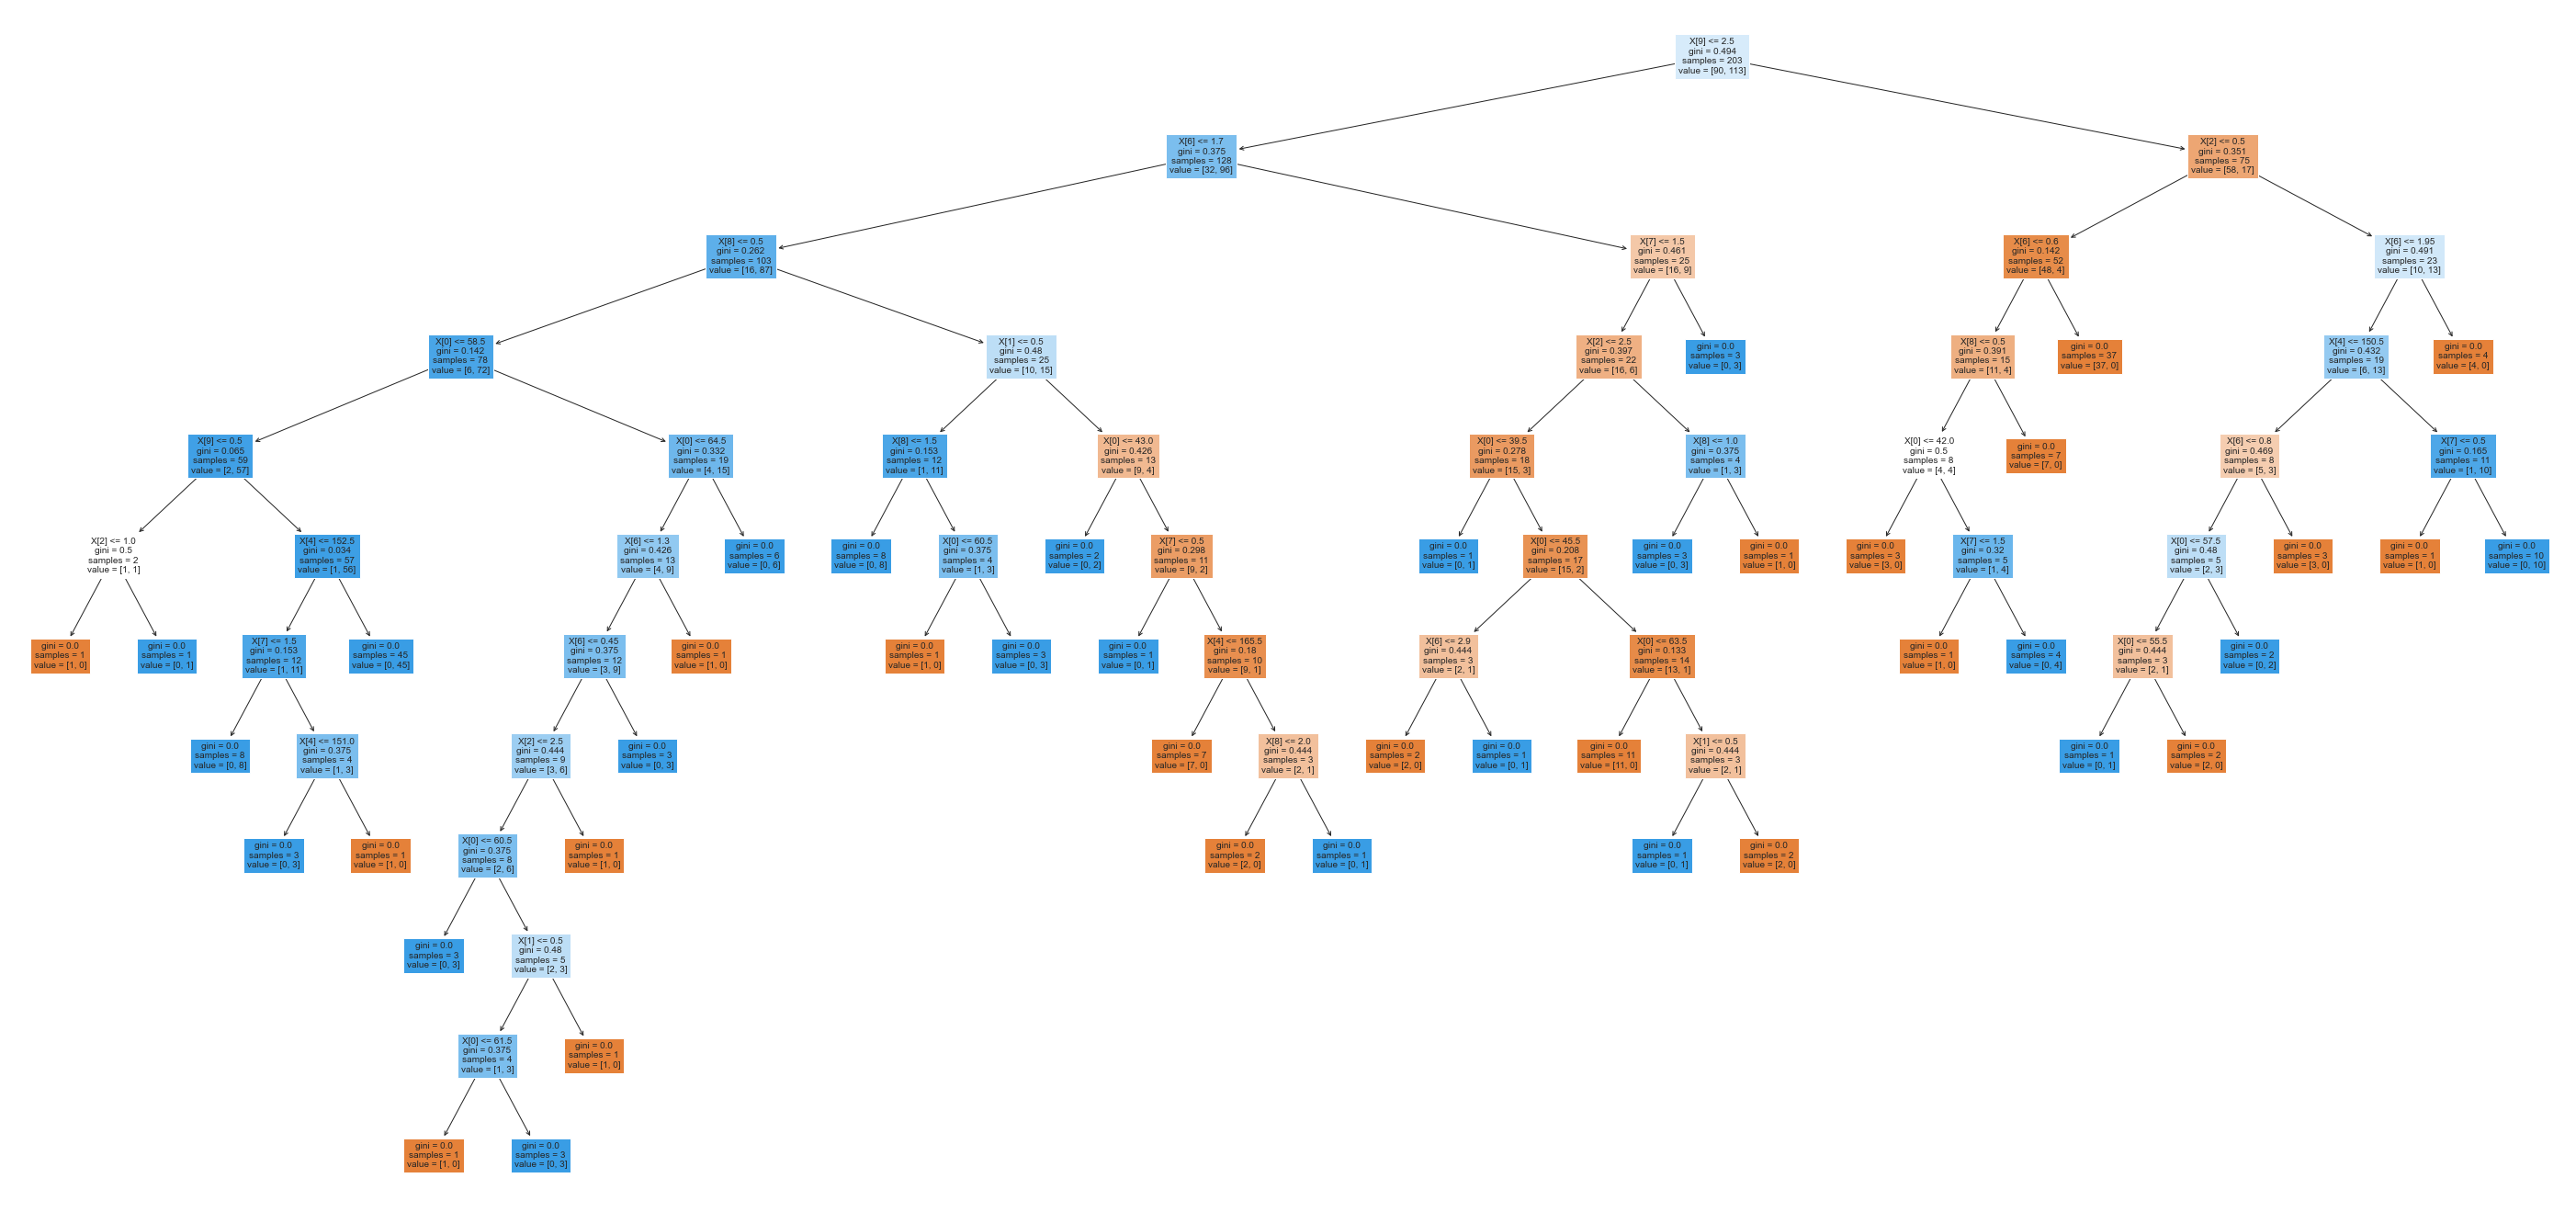

In [705]:
#Vẽ ra cây CART
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf1, filled = True, fontsize = 10)
plt.savefig('Decision Tree CART', dpi = 100)

# XÂY DỰNG THUẬT TOÁN NAIVE BAYES

In [706]:
#Naive Bayes
start_time = time.time()
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

In [707]:
#Tính độ chính xác
p3 = metrics.accuracy_score(y_test, bayes_pred)
bayes_score = p3
end_time = time.time()
t3 = end_time - start_time
print('Thời gian chạy thuật toán là ', t3 )
print("Accuracy: ", p3)
print("Report: ", metrics.classification_report(y_test, bayes_pred))

Thời gian chạy thuật toán là  0.11199212074279785
Accuracy:  0.79
Report:                precision    recall  f1-score   support

           0       0.80      0.75      0.77        48
           1       0.78      0.83      0.80        52

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79       100



# Xây dựng ma trận tương quan 
Confusion Matrix ma trận nhầm lẫn hay ma trận lỗi là một bố cục bảng cụ thể cho phép hình dung hiệu suất của một thuật toán.
Ma trận nhầm lẫn là một trong những kỹ thuật đo lường hiệu suất phổ biến nhất và được sử dụng rộng rãi cho các mô hình phân loại. Nhìn thuât ngữ của nó thì trông có vẻ khó hiểu nhưng thực tế nó lại rất dễ hiểu. Do đó, bài viết này có thể giúp nó trở lên dễ hình dung, dễ hiểu hơn.

Text(0.5, 1.0, 'Naive Bayes Accuracy Score: 0.79')

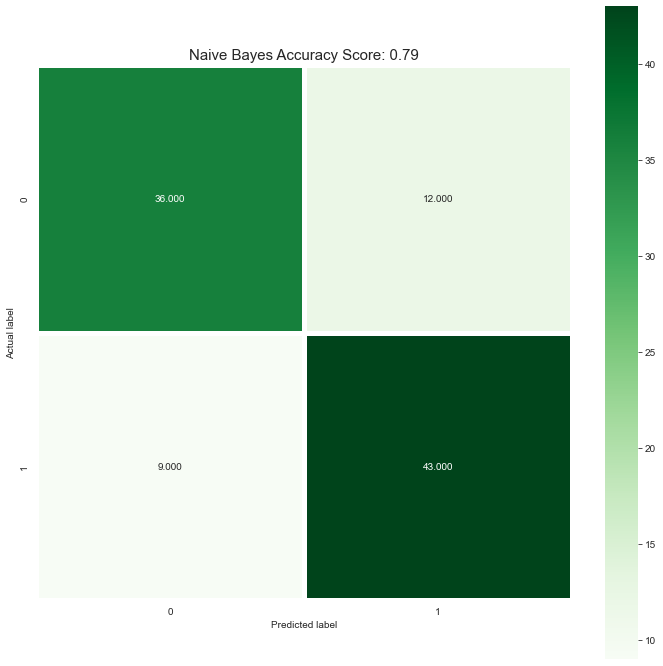

In [708]:
#Biểu diễn ma trận nhầm lẫn dưới dạng đồ thị
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

plt.figure(figsize = (12,12))
sns.heatmap(bayes_cm, annot = True, fmt=".3f", linewidths = 5, square = True, cmap = "Greens");
plt.ylabel("Actual label");
plt.xlabel("Predicted label");
title = "Naive Bayes Accuracy Score: {0}".format(bayes_score)
plt.title(title, size = 15)

# THUẬT TOÁN KNN 

In [709]:
start_time = time.time()

In [710]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 1, p =2)
clf.fit(X_train, y_train)
#y_pred dự đoán 
y_pred = clf.predict(X_test)
end_time = time.time()
print ('Độ chính xác thuật toán')
p4 = metrics.accuracy_score(y_test, y_pred)
print (100*p4)
print('Thời gian chạy thuật toán')
t4 = end_time - start_time
print (t4)

Độ chính xác thuật toán
68.0
Thời gian chạy thuật toán
0.11802840232849121


In [711]:
#Vẽ ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[28 20]
 [12 40]]


Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.68')

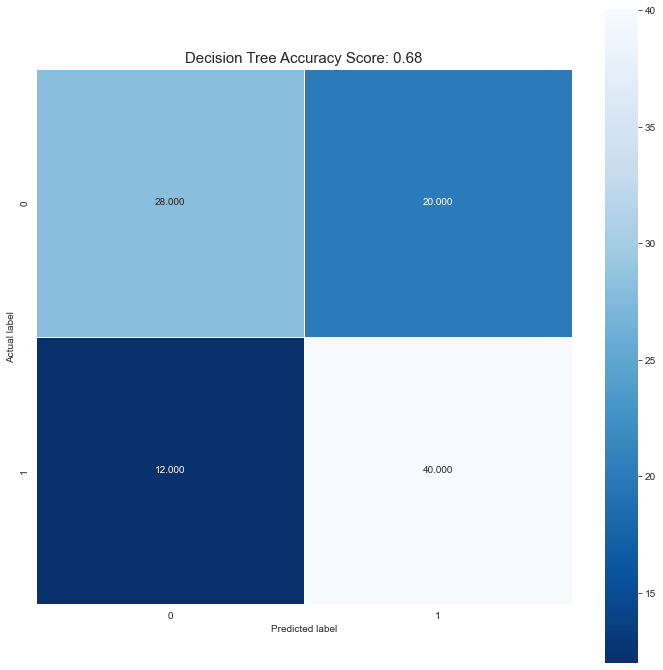

In [712]:
# Biểu diễn dưới dạng đồ thị 
tree_score1 = metrics.accuracy_score(y_test, y_pred)
#Biểu diễn ra dạng đồ thị
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel("Actual label")
plt.xlabel("Predicted label");
title = "Decision Tree Accuracy Score: {0}".format(tree_score1)
plt.title(title, size = 15)

# THUẬT TOÁN RANDOM FOREST 


In [713]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
start_time = time.time()

In [714]:
y_pred = model.predict(X_test)

In [715]:
print ('Độ chính xác thuật toán')
p5 = metrics.accuracy_score(y_test, y_pred)
print (100*p5)
end_time = time.time()
print('Thời gian chạy thuật toán')
t5 = end_time - start_time
print (t5)

Độ chính xác thuật toán
83.0
Thời gian chạy thuật toán
0.11800003051757812


Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.83')

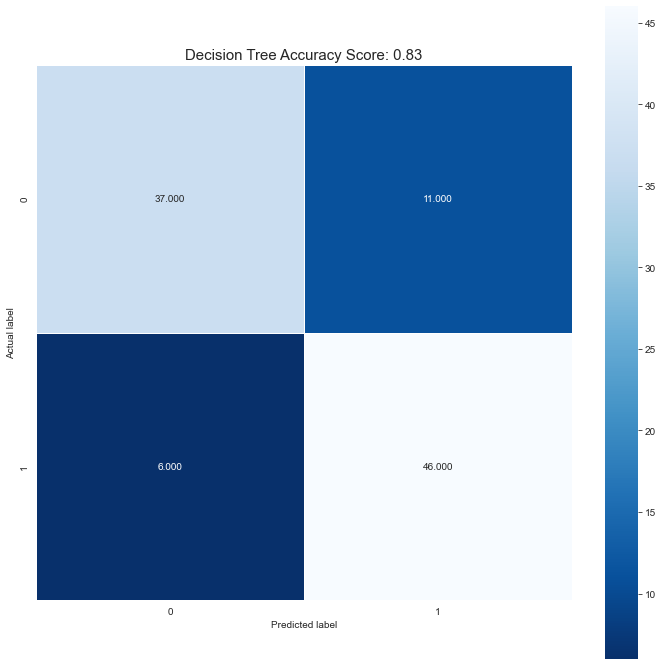

In [716]:
cm = confusion_matrix(y_test, y_pred)
tree_score1 = metrics.accuracy_score(y_test, y_pred)
#Biểu diễn ra dạng đồ thị
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel("Actual label")
plt.xlabel("Predicted label");
title = "Decision Tree Accuracy Score: {0}".format(tree_score1)
plt.title(title, size = 15)

# THUẬT TOÁN LOGISTIC REGRESSION
Nguồn tham khảo: 
1) https://www.youtube.com/watch?v=HYcXgN9HaTM,
2) https://viblo.asia/p/logistic-regression-bai-toan-co-ban-trong-machine-learning-924lJ4rzKPM,
3) https://machinelearningcoban.com/2017/01/27/logisticregression/
4) https://nttuan8.com/bai-2-logistic-regression/

In [717]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
start_time = time.time()

In [718]:

model = LogisticRegression()
model.fit(X_train, y_train)
start_time = time.time()
model = model.predict(X_test)
end_time = time.time()

c:\Users\nkhtr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [719]:
print('Độ chính xác của thuật toán')
score_lr = round(accuracy_score(y_pred,y_test)*100,2)
p6 = accuracy_score(y_pred, y_test)
end_time = time.time()
t6 = end_time - start_time
print(p6)

print(str(score_lr)+" %")

Độ chính xác của thuật toán
0.83
83.0 %


# SO SÁNH THỜI GIAN CHẠY CỦA THUẬT TOÁN 


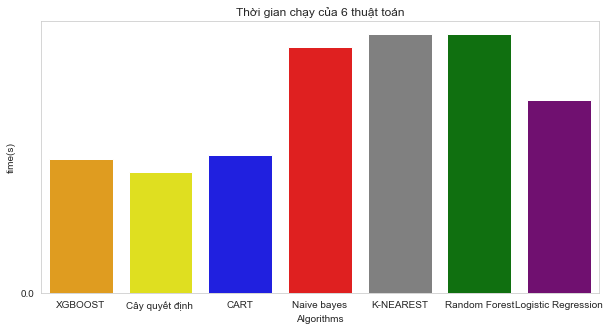

In [720]:
colors = ["orange", "yellow", "blue", "red", "gray", "green", 'purple']
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,10,0.5))
plt.ylabel("time(s)")
plt.xlabel("Algorithms")
plt.title('Thời gian chạy của 6 thuật toán')
accuracies = {"XGBOOST" :xgbooost_accuracy, "Cây quyết định ": p1, "CART": p2, "Naive bayes": p3, "K-NEAREST": p4, "Random Forest": p5, "Logistic Regression": p6}
times = [xgtime,t1,t2,t3,t4,t5,t6]
sns.barplot(x=list(accuracies.keys()), y=list(times), palette=colors)
plt.show()

# ĐO ĐỘ CHÍNH XÁC CỦA CÁC THUẬT TOÁN 

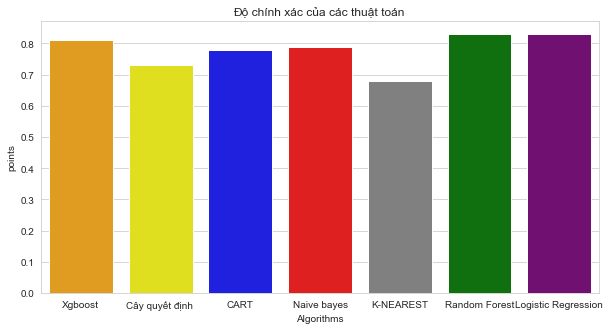

In [721]:
colors = ["orange", "yellow", "blue", "red", "gray", "green", 'purple']
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,10,0.10))
plt.ylabel("points")
plt.xlabel("Algorithms")
plt.title('Độ chính xác của các thuật toán ')
accuracies = { "Xgboost": point_accuracy,"Cây quyết định ": p1, "CART": p2, "Naive bayes": p3, "K-NEAREST": p4, "Random Forest": p5, "Logistic Regression": p6}
#0.81 là độ chính xác của thuật toán xgboost
points = [0.81,p1,p2,p3,p4,p5,p6]
sns.barplot(x=list(accuracies.keys()), y=list(points), palette=colors)
plt.show()